# *Data Aggregation*
### Introduction to the Data

In [1]:
import pandas as pd

happiness2015 = pd.read_csv('World_Happiness_2015.csv')
print(happiness2015.info())

first_5 = happiness2015.head()
first_5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Using Loops to Aggregate Data

In [2]:
mean_happiness = {}
regions = happiness2015['Region'].unique()
for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

### Creating GroupBy Objects

In [3]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')
aus_nz.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Exploring Groupby Objects

In [4]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group

equal

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


### Common Aggregation Methods with Groupby

In [5]:
grouped = happiness2015.groupby('Region')
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


### Aggregating Specific Columns with Groupby

In [6]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

### Introduction to the Agg() Method

In [7]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

### Computing Multiple and Custom Aggregations with the Agg() Method

In [8]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

### Aggregation with Pivot Tables

In [9]:
import matplotlib.pyplot as plt

pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)
plt.show()

world_mean_happiness = happiness2015['Happiness Score'].mean()
world_mean_happiness

<Figure size 640x480 with 1 Axes>

5.3757341772151905

### Aggregating Multiple Columns and Functions with Pivot Tables

In [10]:
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]

happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 
                                                  'Region', aggfunc=[np.min, np.max, np.mean], margins=True)

pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

# *Combining Data With Pandas*
### Introduction

In [72]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### Combining Dataframes with the Concat Function

In [73]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
# question1 = 6
# question2 = 3

print(concat_axis0.head())
concat_axis1.head()

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016


,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


###  Combining Dataframes with the Concat Function Continued

In [74]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016], sort=False)
rows = 7
columns = 4

concat_axis0.head()

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN


### Combining Dataframes with Different Shapes Using the Concat Function

In [75]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True, sort=True)
concat_update_index.head()

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016


### Joining Dataframes with the Merge Function

In [76]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged.head()

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


### Joining on Columns with the Merge Function

In [77]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
print(merged)

merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
print('\n', merged_left)

merged_left_updated = pd.merge(left=three_2016, right=three_2015, how='left', on='Country')
merged_left_updated

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016

    Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### Left Joins with the Merge Function

In [78]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
print(merged)

merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
print('\n', merged_updated)

merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', 
                           suffixes=('_2015', '_2016'))
print('\n', merged_suffixes)

merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', 
                                   suffixes=('_2016', '_2015'))
merged_updated_suffixes

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN

    Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN

    Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### Join on Index with the Merge Function

In [79]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, 
                       right_index = True, suffixes = ('_2015','_2016'))
print(merge_index)

rows = 4
columns = 6

merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', 
                            left_index=True, right_index=True, suffixes=('_2015','_2016'))
merge_index_left

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  


,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Challenge: Combine Data and Create a Visualization

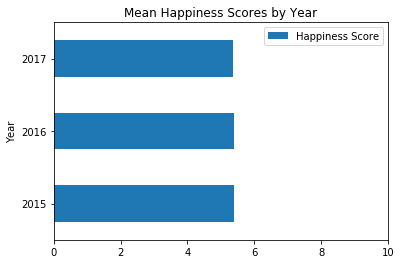

In [80]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017], sort=True)

pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)

# Plotting
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))
plt.show()

# *Transforming Data With Python*

### Introduction

In [81]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis = 1)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### Apply a Function Element-wise Using the Map and Apply Methods

In [82]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015['Economy'].map(label)

economy_impact_apply = happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)
equal

True

### Apply a Function Element-wise Using the Map and Apply Methods Continued

In [83]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x = .8)
economy_impact_apply.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

### Apply a Function Element-wise to Multiple Columns Using Applymap Method

In [84]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


### Apply Functions along an Axis using the Apply Method

In [85]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct.head()

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


### Apply Functions along an Axis using the Apply Method Continued

In [86]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score'] 
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


### Reshaping Data with the Melt Function

In [87]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


### Challenge: Aggregate the Data and Create a Visualization

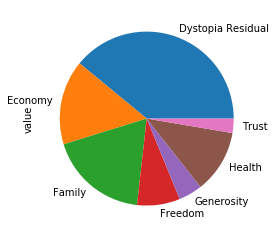

In [88]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], 
               value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 
                            'Dystopia Residual'])

melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index='variable', values='value')

pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()

# *Working With Strings in Pandas*

### Introduction

In [89]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')

merged = merged.rename(col_renaming, axis=1)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


### Using Apply to Transform Strings

In [90]:
def extract_last_word(element):
    return str(element).split()[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar


### Vectorized String Methods Overview

In [91]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


### Exploring Missing Values with Vectorized String Methods

In [92]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

### Finding Specific Words in Strings

In [93]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)

print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


### Finding Specific Words in Strings Continued

In [94]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False)
merged_national_accounts = merged[national_accounts]

merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### Extracting Substrings from a Series

In [95]:
pattern = r"([1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extract(pattern)
years.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


### Extracting Substrings from a Series Continued

In [96]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand=True)

years.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


###  Extracting All Matches of a Pattern from a Series

In [97]:
merged = merged.set_index('Country')

pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)

value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1992     1
2002     1
2003     1
2006     1
1995     1
2000     1
1998     1
1999     1
Name: Years, dtype: int64


###  Extracting More Than One Group of Patterns from a Series

In [98]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

years.head()

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN


### Challenge: Clean a String Column, Aggregate the Data, and Plot the Results

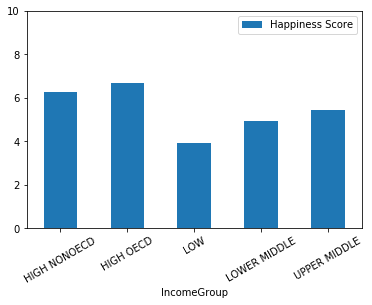

In [99]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()

pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

# *Working With Missing And Duplicate Data*
### Introduction

In [167]:
happiness2015 = pd.read_csv('wh_2015.csv')
shape_2015 = happiness2015.shape
print(shape_2015)

happiness2016 = pd.read_csv('wh_2016.csv')
shape_2016 = happiness2016.shape
print(shape_2016)

happiness2017 = pd.read_csv('wh_2017.csv')
shape_2017 = happiness2017.shape
print(shape_2017)

(164, 13)
(164, 14)
(164, 13)


### Identifying Missing Values

In [168]:
missing_2016 = happiness2016.isnull().sum()
print(missing_2016)

missing_2017 = happiness2017.isnull().sum()
print('\n', missing_2017)

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

 Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64


### Correcting Data Cleaning Errors that Result in Missing Values

In [169]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()

happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

missing = combined.isnull().sum()
print(missing)

combined.head()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64


,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


###  Visualizing Missing Data

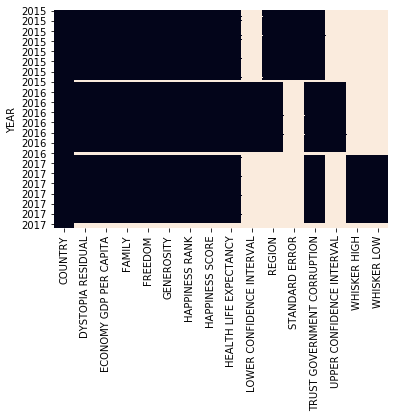

In [170]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [171]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

missing

164

### Using Data From Additional Sources to Fill in Missing Values

In [172]:
cr_2015 = happiness2015[['COUNTRY', 'REGION']].dropna()
cr_2016 = happiness2016[['COUNTRY', 'REGION']].dropna()

cr_combined = pd.concat([cr_2015, cr_2016])
regions = cr_combined.drop_duplicates().reset_index(drop=True)
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [173]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')

combined = combined.drop('REGION_x', axis = 1)

missing = combined.isnull().sum()
print(missing)
combined.head()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                         0
dtype: int64


,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


### Identifying Duplicate Values

In [174]:
combined.rename(columns={'REGION_y': 'REGION'}, inplace=True)

combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])

combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicate Values

In [175]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


### Handle Missing Values by Dropping Columns

In [176]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis = 1)

missing = combined.isnull().sum()
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

### Handle Missing Values by Dropping Columns Continued

In [177]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()

missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

### Analyzing Missing Data

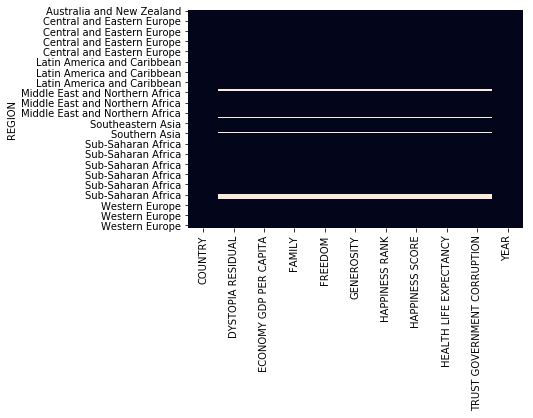

In [178]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

###  Handling Missing Values with Imputation

In [179]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)

combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882893
5.370727659882894


### Dropping Rows

In [182]:
combined = combined.dropna()

missing = combined.isnull().sum()
missing

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64